C:\Users\Johannes\AppData\Local\Temp\ipykernel_20840\2862704878.py:9: DeprecationWarning: Please import `correlate` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  ys=filters.correlate(y,array([-1,1])/dx,mode='nearest')


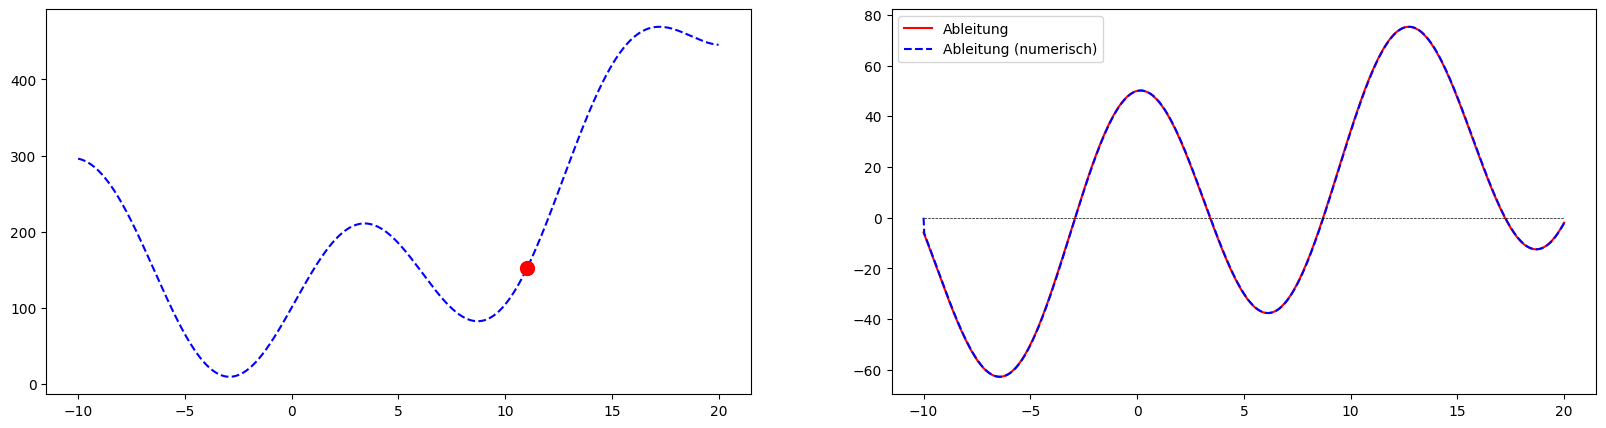

In [1]:
%matplotlib inline
from pylab import *
import scipy.ndimage.filters as filters

x=linspace(-10,20,1000)
dx=x[1]-x[0]
y=100+x**2+sin(x/2)*100
ys_cf=2*x+cos(x/2)/2*100;
ys=filters.correlate(y,array([-1,1])/dx,mode='nearest')

p0 = 700;

figure(figsize=[20,5])
subplot(1,2,1); plot(x,y,'b--')
plot(x[p0],y[p0],'r.',markersize=20);

subplot(1,2,2); plot(x,ys_cf,'r-', label="Ableitung"); 
plot(x,ys,'b--',label="Ableitung (numerisch)"); 
plot([min(x),max(x)],[0,0],'k--',linewidth=0.5); legend();

## Gradientenabstieg
direkter Gradientenabstieg mit $x = x - \lambda \cdot f'(x)$ 

Siehe: z.B. http://www.onmyphd.com/?p=gradient.descent (03/2018)

### Gradientenabstieg (Basiscode, Beispiel mit einem Startpunkt)

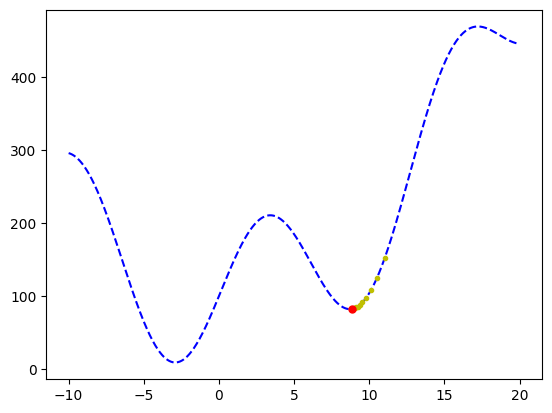

In [2]:
def doit2(p0, lambda_val=0.3):
    """
    Gradientenabstieg durchführen.
    (1) Startpunkt p0
    (2) Schleife:
    (2.1) Aktueller Punkt in einer Liste ps speichern: ps.append(p)
    (2.2) Ableitung (Gradient) an Stelle (index) int(p) ausrechnen (oder auslesen)
    (2.3) p um (-lambda_val * gradient) verschieben (Gradientenabstieg)
    (2.4) p zu einem Integer runden: int(p) (weil wir ihn als Index verwenden)
    Am Ende p zurückgeben
    Optional: Zwischenpunkte aus ps plotten
    """
    ps=[]
    p=p0
    
    while True:
        ps.append(p)
        grad = ys[p]
        delta = int((-lambda_val * grad))
        p += delta
        if delta == 0:
            break
    
    return p, ps
    
p, ps = doit2(p0)

figure()
plot(x,y,'b--',label='function')
for val in ps:
    plot(x[val], y[val], 'y.')
plot(x[p],y[p],'r.',markersize=10,label='final')
plt.show()


### Wiederholdung für verschiedene Startpunkte

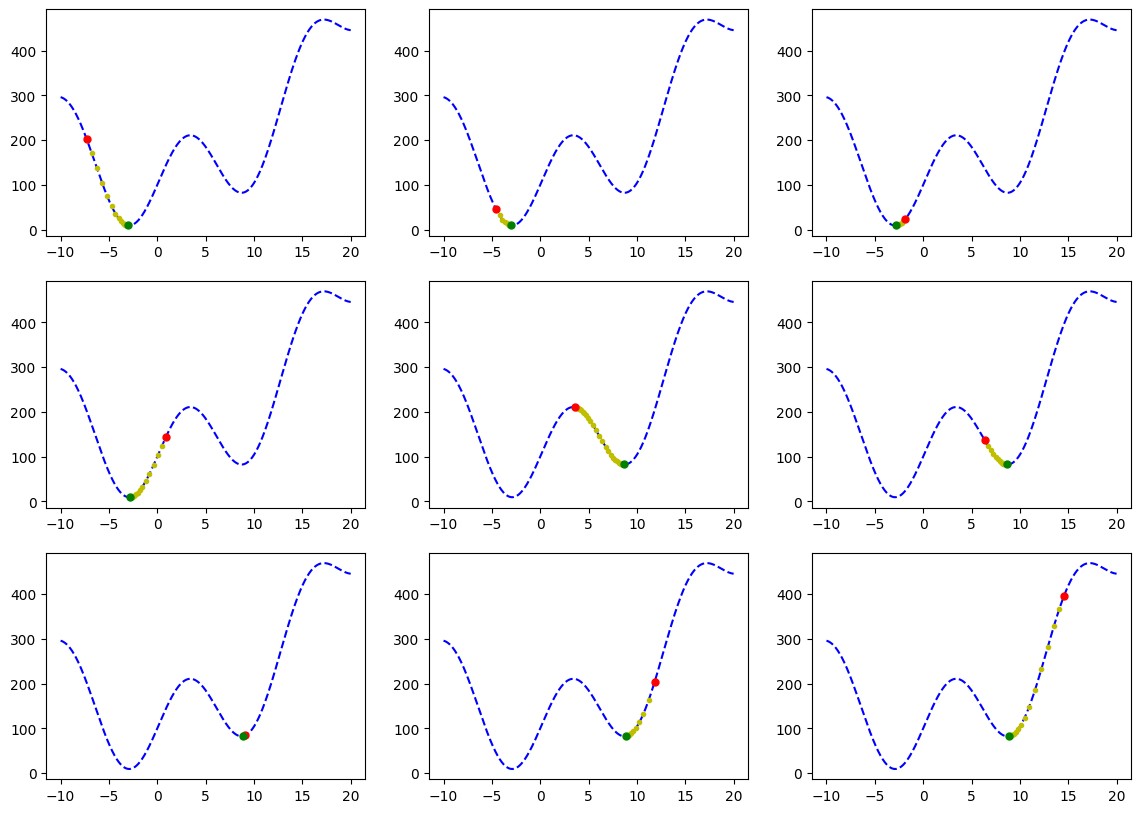

In [3]:
figure(figsize=[14,10])
for k in range(9):
    p0 = int(len(x)*(k+1)/11)
    subplot(3,3,k+1)
    p, ps = doit2(p0)

    plot(x,y,'b--',label='function')
    for val in ps:
        plot(x[val], y[val], 'y.')
    plot(x[p0],y[p0],'r.',markersize=10,label='final')
    plot(x[p],y[p],'g.',markersize=10,label='final')


# 3D Fall: Kreisfit (3 Parameter)

 * Parameter (zu schätzen): $m_x,m_y,r$ (Mittelpunkt und Radius)
 * Kreisgleichung: Abstand eines Punkts $(x,y)$ zu Mittelpunkt = Radius
   $$ \sqrt{ (x-m_x)^2 + (y-m_y)^2 } - r = 0 $$

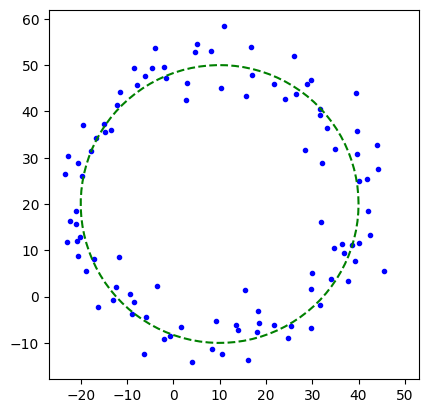

In [4]:
# zu schäzende Werte
mx0 = 10
my0 = 20
r0 = 30

sig = 4 # rauschen

a = linspace(0,2*pi,100)
x0 = mx0 + cos(a)*r0
y0 = my0 + sin(a)*r0
x = x0 + randn(len(a))*sig
y = y0 + randn(len(a))*sig

plot(x,y,'b.'); axis("square")
plot(x0,y0,'g--');

## scipy.optimize
scipy.optimize bietet eine Reihe von Standard-Verfahren an, um Funktionen zu minimieren.

Schätzen Sie die drei Kreisparameter und erzeugen Sie einen Plot wie folgt:
![Bild](kreis_fit_soll.png)

Der zu minimierende Fehler muss aus der Kreisgleichung abgeleitet werden: Summieren Sie alle quadrierten Fehler auf.

Geschätzter Mittelpunkt (mx, my): 9.42430465188388 20.96556168965736
Geschätzter Radius (r): 30.423755249996802


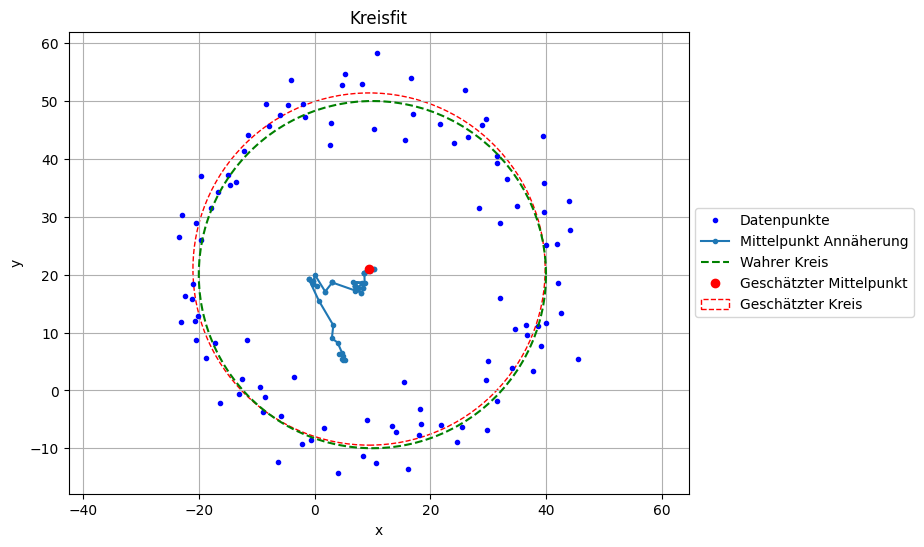

In [5]:
from scipy.optimize import minimize
# see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html

def FehlerFormel(p):
    alle_abweichungen = np.sqrt((x - p[0])**2 + (y - p[1])**2) - p[2]
    return sum( (alle_abweichungen)**2 )

centers_x = []
centers_y = []
def cb(p):
    centers_x.append(p[0])
    centers_y.append(p[1])

params0 = [5, 5, 5]
result = minimize(FehlerFormel, params0, callback=cb, method='Nelder-Mead')
mx_geschaetzt, my_geschaetzt, r_geschaetzt = result.x


print("Geschätzter Mittelpunkt (mx, my):", mx_geschaetzt, my_geschaetzt)
print("Geschätzter Radius (r):", r_geschaetzt)

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b.', label='Datenpunkte')
plt.plot(centers_x, centers_y, marker='.', label='Mittelpunkt Annäherung')
plt.plot(x0, y0, 'g--', label='Wahrer Kreis')
plt.plot(mx_geschaetzt, my_geschaetzt, 'ro', label='Geschätzter Mittelpunkt')
plt.gca().add_patch(plt.Circle((mx_geschaetzt, my_geschaetzt), r_geschaetzt, color='r', fill=False, linestyle='--', label='Geschätzter Kreis'))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kreisfit')
plt.axis('equal')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()